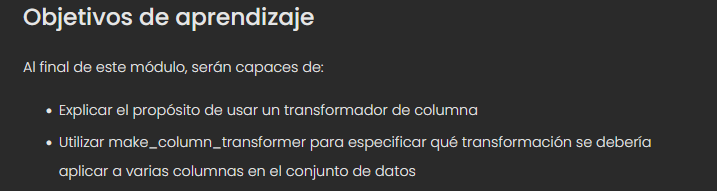

# Transofmrador de columna

Los datos del mundo real suelen contener tipos de datos heterogeneos. Cuando se procesan los datos antes de aplicar el modelo de pridccion final, normalmente queremos usar diferentes pasos de preprocesamiento y transformaciones para esos diferentes tipos de columas 

ejemplo: queremos escalar las caracteristicas numericas y usar una codificacion one-hot a las caracteristicas categoricas.

en las clases anteriores transformaron cada columna separadamente y luego las combinaron manualmente.

En esta clase utilizaran ColumnTransformer para que lo haga por ustedes.

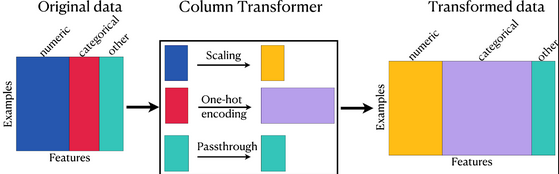


Se puede ver que el transforamdor de columna funciona en paralelo. Escala los datos numericos, realiza una codificacion one-hot en los datos categoricos y todo lo demas que no esta en esas categorias se pasa al conjunto de datos inalterado final. Estos pasos ocurren al mismo tiempo.

tambien observen que las columnas categoricas son ahora mas largas de lo que eran, puesto que se crean tantas como categorias tenga una caracteristica luego de la codificacion one-hot

al usar un transformador de columna les permitira aplicar diferentes tipos de transformador a diferentes columnas en los datos. es conveniente y permite ver facilmente que transformaciojnes se aplicaron a que columnas durante la fase de preprocesamiento.




#EJEMPLO

El proposito de esta clase es preparar este conjunto de datos con los pasos de procesamiento para el aprendizaje automatico.

realizaran uan codificacion one-hot a las columnas categoricas

escalaran las columnas numericas

en cuanto los datos se hayan transformados se veran los datos como un dataframe de pandas

en la clase codificacion ordinal y onehotencoder, se mostro como seleccionar las caracteristicas del objeto y ponerlas en un dataframe separado para la codificacion one-hot, luego tuvieron que unir el dataframe de codificacion one-hot con las columnas numericas.

en este ejemplo veran como realizar diferentes transformaciones de procesaiento a diferentes caracteristicas en los datos en un paso usando un transformador de columna. simultaneamente.


> escalaran columnas numericas usando standard scaler

> realizara una codificacion one-hot a las columnas categoricas usando onehotencoder

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [3]:
filename = "/content/drive/MyDrive/Data CodingDojo/medical.xlsx"
df = pd.read_excel(filename)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53.0,14370.14,Widowed,Female,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78.0,39741.49,Married,Male,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22.0,1209.56,Widowed,Female,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,CT Scan,1.254807,2113.073274,3716.525786


In [4]:
X = df.drop(columns= "Additional_charges")
y = df["Additional_charges"]
X_train,X_test,y_train,y_test = train_test_split(X,y , random_state =42)

# Realizar selectores de columnas

In [5]:
# instalciar los selectores de columnas categoricas y numericas para seleccionar las columnas adecuadas
cat_selector = make_column_selector(dtype_include = "object")
num_selector = make_column_selector(dtype_include = "number")

# Instanciar los transformadores

ahora que han realizado los selectores, necesitan instanciar cada uno de los transformadores de columnas que quieran usar. Ambos son procesadores comunes que a menudo usaran en el procesamiento. 

un StandardScaler para escalar las columnas numericas 

un OneHotEncoder para codificar las oclumnas categoricas

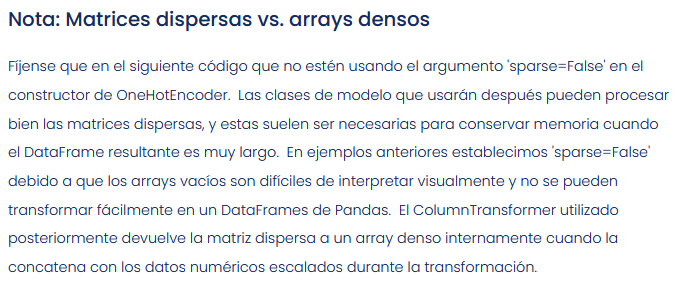

In [6]:
# Instanciar el escalador estandar y el codificador one hot

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore")

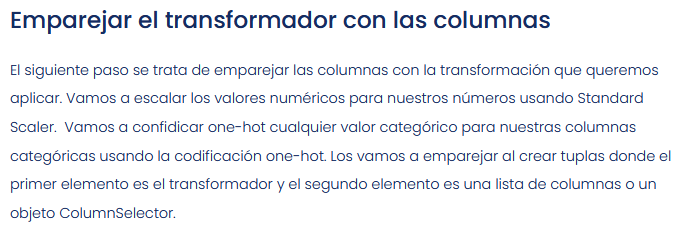

In [7]:
#make tuples for preprocessing the categorical and numeric columns

num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

# Instanciacion de ColumnTransformer

ahora tenemos que instanciar el transformador de columna y agregar cada una de las tuplas que creamos antes. Observern que tenemos un nuevo import para obtener make_column_transformer

In [8]:
from sklearn.compose import make_column_transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

#Encajar el transformador
observen que solo encajaremos los datos de entrenamiento

In [9]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f39784d1c10>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f39784d1a30>)])

# Transformacion

ahora podemos _transformar_ los conjuntos de entrenamiento y de prueba

In [10]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

# Ver las transformaciones

si bien no es necesario para modelos, puede ser util ver lo que han alcanzado los codigos.

el resultado es un array que es dificil de leer, sin embargo, podemos cambiarlo en un dataframe de pandas para que sea facil de ver e interpretar.

In [11]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.508205,0.281935,-0.060153,0.272586,-1.123467,0.0,0.509399,-0.008943,0.014639,-0.620174,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.720642,0.252836,1.241233,1.119125,-0.619881,0.0,-0.999823,1.907372,0.014639,-0.620174,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.493403,0.482823,-0.493948,0.272586,-0.518276,0.0,0.119354,-0.967100,0.014639,-0.620174,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.134821,-0.434666,2.108824,1.307245,1.938720,0.0,-1.044875,-0.008943,-0.983474,2.762592,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.587322,0.497439,-0.927744,-0.809103,-0.328240,0.0,1.283708,-0.008943,0.014639,-0.620174,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [12]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       750 non-null    float64
 1   1       750 non-null    float64
 2   2       750 non-null    float64
 3   3       750 non-null    float64
 4   4       750 non-null    float64
 5   5       750 non-null    float64
 6   6       750 non-null    float64
 7   7       750 non-null    float64
 8   8       750 non-null    float64
 9   9       750 non-null    float64
 10  10      750 non-null    float64
 11  11      750 non-null    float64
 12  12      750 non-null    float64
 13  13      750 non-null    float64
 14  14      750 non-null    float64
 15  15      750 non-null    float64
 16  16      750 non-null    float64
 17  17      750 non-null    float64
 18  18      750 non-null    float64
 19  19      750 non-null    float64
 20  20      750 non-null    float64
 21  21      750 non-null    float64
 22  2

# Resumen

a menudo necesitaran hacer diferentes transformaciones en diferentes columnas.

ColumnTransformer pueden dividir las columnas, transformar diferentes columnas de diferentes maneras , y luego unirlas otra vez de forma automatica. Esto les ahorrara tiempo y codigo , hara que, de sus procesos mas transparentes, ayudara a evitar una fuga de datos y preparara el flujo de trabajo de procesamiento para una futura implementacion en el mundo real.